# Decision Trees

## Introduction and Formulation

A decision tree is a non-parametric **Supervised** learning method used for **Classification and Regression.** The objective is to learn simple decision rules inferred from the data features. 

<figure>
    <center><img src="img/decision_tree.png" width="300" height="300">
    <figcaption>Fig: Decision Tree</figcaption></center>
</figure>

Starting from a base node, the strategy is to choose the attribute which **maximizes the Information Gain** and create a partition of the tree using that attribute
$$
(\text{Entropy}) \quad H(x) = -\sum_{i=1}^n P(x_i)\log_bP(x_i) 
$$
<figure>
    <center><img src="img/entropy.png" width="300" height="300">
    <figcaption>Fig: Binary Entropy function</figcaption></center>
</figure>

$$
(\text{Information Gain}) \quad \text{IG}(S,D) = H(S) - \sum_{V \in D} \frac{|V|}{|D|}H(V)
$$
That is, the information before the split (S) - the information after the split (D). The resulting separation boundaries looks like this

<figure>
    <center><img src="img/decision_tree_data.png" width="600" height="300">
    <figcaption>Fig: Decision Tree Boundaries</figcaption></center>
</figure>

## Important Parameters

 - **Max Depth**: Controls the max number of nodes and layers of the tree and hence, the fitting of the model (prevent overfitting by choosing a moderate depth) Default: Until all leaves are pure or until all leaves contain less than 2

## Relevant Information: 
 - Decision trees are **not sensitive to feature scaling.**
 - Approx Complexity $O(NM \cdot \log(M))$ where $N$ number of attributes and $M$ the number of instances. 

## Implementation

We are going to work with the [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) Dataset

In [1]:
#Import usual libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#Import usual functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score

#Import utils
from utils.plot import confusion_matrix_custom

#Import required libraries and functions
from sklearn.datasets import load_iris, load_digits
from sklearn.tree import DecisionTreeClassifier


In [2]:
#Load the dataset 
digits = load_digits()
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df["target"] = digits.target
df.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Simple Use

In [3]:
#Divide the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.333, stratify = df["target"], random_state=666)
#Create the model
clf = DecisionTreeClassifier()
#Fit the data
clf.fit(X_train,y_train)
#Make a prediction
y_pred = clf.predict(X_test)


### Show Performance

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.77      0.84      0.80        61
           2       0.87      0.80      0.83        59
           3       0.78      0.82      0.80        61
           4       0.86      0.85      0.86        60
           5       0.89      0.89      0.89        61
           6       0.92      0.97      0.94        60
           7       0.87      0.80      0.83        60
           8       0.80      0.84      0.82        58
           9       0.81      0.80      0.81        60

    accuracy                           0.85       599
   macro avg       0.86      0.85      0.86       599
weighted avg       0.86      0.85      0.85       599



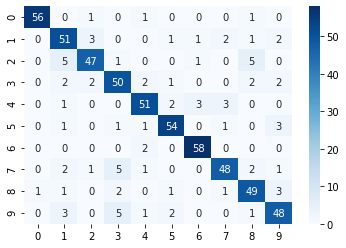

In [4]:
#Change of notation
y_real = y_test

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred)

#Showing performance with metrics
print(classification_report(y_real , y_pred))


### Showing max_depth effect

Text(0, 0.5, 'Test Accuracy')

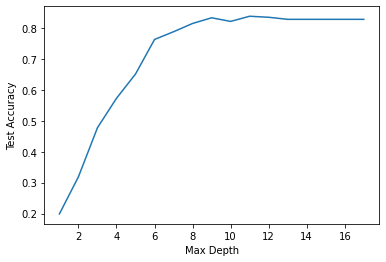

In [7]:
#Creating a list of max_depth options
max_depth_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
accuracy_list = []

#Creating the models with fixed max_depth
for depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 666)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_list.append(accuracy_score(y_real,y_pred))

#Plotting
plt.plot(max_depth_list,accuracy_list)
plt.xlabel("Max Depth")
plt.ylabel("Test Accuracy")

    
